# Lab 4.4: Confidence Intervals

## Outline

- z-score
- t-distribution
- Confidence Interval Basics
- Confidence Interval for One Sample Mean

**Question 1**

1) Write down the standard Normal distribution.

$$ {X} {\sim} N(\mu, {\sigma^2}) $$  

   <br>

2) z-score measures how many `_standard deviations_` a value is from the mean.
   - units
   - variances
   
    $ {\sim} $ - standard deviations 
    
   
   - medians
   - modes

   <br>

3) Given a Normal distribution that has mean of 10.5 and variance of 3.2, compute the
   - z-score for observing a value of 8.3
   - probability of observing a z-score greater than the calculated value above
   
   <br>

$P(\bar{X} = 8.3)$

# Question 1.1

standard normal distribution

$$ {X} {\sim} N(\mu, {\sigma^2}) $$ 

standard normal mean : $\mu = 0 \\ $

standard normal deviation : $\sigma = 1$

# Question 1.2

z-score measures standard deviations away from the mean

# Question 1.3

In [5]:
%pylab inline

import pandas as pd
from scipy import stats
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## $Z = \frac{\bar{X} - \mu}{\sqrt{\sigma^2}}$


In [10]:
z_score = (8.3 - 10.5) / np.sqrt(3.2)
z_score

-1.229837387624884

In [8]:
print("probability of getting higher than this z-score:\n", 1 - stats.norm(10.5, np.sqrt(3.2)).cdf(8.3))

probability of getting higher than this z-score:
 0.890620997733


# Question 1.4

4) Verify that the probability of observing a z-score greater than calculated in `3.` is same that the probability of observing a value greater than 8.3 from the original Normal distribution (with mean 10.5 and variance 3.2).  

   <br>

In [14]:
1 - stats.norm(0, 1).cdf(z_score)

0.89062099773330372

   
5) For the standard Normal random variable $Z$, compute the following: 
1. $P(0.2 < Z \leq 1.4)$
2. $P(-1.48 \leq Z \leq 0.4)$
3. $P(Z > 1.23)$
4. $E(3 + 3Z)$
5. $Var(3 + 3Z)$  

   <br>

# Question 1.5

In [23]:
print("1. ", stats.norm(0, 1).cdf(1.4) - stats.norm(0, 1).cdf(.2))
print("2. ", stats.norm(0, 1).cdf(.4) - stats.norm(0, 1).cdf(-1.48))
print("3. ", 1 - stats.norm(0, 1).cdf(1.23))
print("4. ", 3+0)
print("5. ", 3+1)

1.  0.339983631327
2.  0.585985118277
3.  0.109348552426
4.  3
5.  4


1. $P(0.2 < Z \leq 1.4)$ = .9192 - .5793 = 0.3399
2. $P(-1.48 \leq Z \leq 0.4)$ = .6554 - .0694 = 0.586
3. $P(Z > 1.23)$ = 1 - .8907 = .1093
4. $E(3 + 3Z)$ = 3
5. $Var(3 + 3Z)$  = 4

   <br>

**Question 2**
   
1) Visually, what is the difference between a t-distribution and a standard Normal distribution? 

   <br> 

# Question 2.1

The t-distribution has more "spread" or fatter tails than the Normal.

And is defined by its degrees of freedom which is n-1. 

   
2) Plot the pdf of the following distributions.  

* Standard Normal $N(0, 1)$
* $t_{5}$
* $t_{10}$
* $t_{100}$
* $t_{10000}$
  

# Question 2.2

In [41]:
from scipy.stats import t
import matplotlib.pyplot as plt

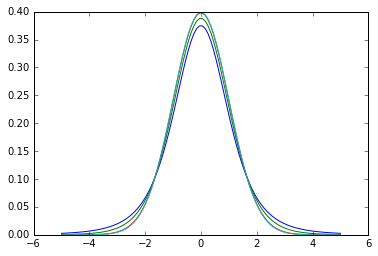

In [52]:
x = np.linspace(-5, 5, 100)
t5 = t.pdf(x,4)
t10 = t.pdf(x,9)
t100 = t.pdf(x,99)
t10000 = t.pdf(x,9999)
plt.plot(x, t5)
plt.plot(x, t10)
plt.plot(x, t100)
plt.plot(x, t10000);

3) Comment on the plots. How does the shape of t-distribution change as the degrees of freedom change?   

   <br>

# Question 2.3

As the degrees of freedom increase, the distribution becomes tighter around the mean. 

**Question 3**

1) Explain why confidence interval is more informative than a point estimate.

   <br>

# Question 3.1

The point estimate is rarely 100% correct. Whereas a range of prob. values using the Confidence Interval allows for prediction parameters to be made, ie. 99%, 95% or 90%, for example.  Point estimates do not allow for this. 

2) Explain why the following statement is **wrong**:
   - The 95% confidence interval means there is a 95% chance that the true value lies in the interval|
   
   <br>

Wrong.  There is a 95% chance that our Interval includes the mean. 

3) Explain in plain words what the following means:
   - The 95% confidence interval of the click through rate to website A is 0.10 to 0.15

   <br>

If we sampled the population and used this same method, we would find that our CI of the CTR would include the mean 95% of the time - the true (but unknown) mean.

4) You are presented with 2 measurements below, select the measurement that is more precise and explain why that is.
   - **Measurement 1**: 5.00 cm with 95% confidence interval of (4.52 cm, 5.52 cm)
   - **Measurement 2**: 5.20 cm with 95% confidence interval of (5.13 cm, 5.22 cm)

   <br>

MEasurement 2 is more precise.  It's CI in M2 has a tighter/narrower range(-0.07 to 0.02) than that found in M1(-.48 to 0.52).

5) Is a 99% confidence interval wider or narrower than a 90% confidence interval?  

   <br>

a 99% CI would be wider.

**Question 4**

1) Suppose Google sampled 200 of its employees and measured how long they are gone for lunch. 
   - Download the data from https://s3-us-west-2.amazonaws.com/dsci/6002/data/lunch_hour.txt (right click -> "Save Link As...")
   - Load the data by `numpy.loadtxt('lunch_hour_200.txt')`
   - Compute the mean lunch hour of the sample
   - Compute the 95% confidence interval for how long, on average, Google employees take to have lunch.
     (**_There is a python function to calculate this, which you will use later to verify your results; for this part, calculate it by following the formula given in class_**)

   <br>

# Question 4.1

In [57]:
lunch = np.loadtxt('lunch_hour.txt')

In [61]:
xbar = lunch.mean()
xbar

2.1844999999999999

In [64]:
std_dev = lunch.std()
std_dev

0.57732984506259499

In [67]:
n = len(lunch)
n

200

We are 95% confident that the true mean $\mu$ is in the interval  

$$ (\bar{X} - 1.96 \frac{\sigma}{\sqrt{n}} \text{, } \bar{X} + 1.96 \frac{\sigma}{\sqrt{n}}) $$

$$ (2.1845 - 1.96 \frac{.5773}{\sqrt{200}} \text{, } 2.1845 + 1.96 \frac{.5773}{\sqrt{200}}) $$

$$ (2.104 \text{, } 2.265) $$

In [91]:
xbar + 1.96*(std_dev/sqrt(n))

2.2645138342913271

In [90]:
xbar - 1.96*(std_dev/sqrt(n))

2.1044861657086726

   
2) Suppose only the first 20 employees are sampled. Re-compute the 95% confidence interval based on this smaller sample.

   <br>

# Question 4.2

We are 95% confident that the true mean $\mu$ is in the interval  

$$ (\bar{X} - 1.96 \frac{\sigma}{\sqrt{n}} \text{, } \bar{X} + 1.96 \frac{\sigma}{\sqrt{n}}) $$

$$ (2.1845 - 1.96 \frac{.5773}{\sqrt{20}} \text{, } 2.1845 + 1.96 \frac{.5773}{\sqrt{20}}) $$

$$ (1.929 \text{, } 2.440) $$

In [92]:
xbar - 1.98*(std_dev/sqrt(20))

1.928892141758122

In [93]:
xbar + 1.98*(std_dev/sqrt(20))

2.4401078582418778

   
3) Use the following Python functions to verify your results above (which one should you use?):

```python
# Function to calculate z-based 95% CI
scipy.stats.norm.interval(0.05, mean, std)

# Function to calculate t-based 95% with 19 degrees of freedom
scipy.stats.t.interval(0.05, 19, mean, std)
```

   <br>

In [86]:
stats.norm.interval(0.05, xbar, std_dev)

(2.1482975056056697, 2.2207024943943301)

In [87]:
stats.t.interval(0.05, 19, xbar, std_dev)

(2.1478162916151451, 2.2211837083412385)

### Question 3.3

In this case, we should use the z-distribution because we have more data points and a tighter interval.

**Question 5**

A survey is planned to determine the mean annual family medical expenses of employees of a large company. The management of the company wishes to be 95% confident that the sample mean is
correct to within +/- \$50 of the true population mean of annual family medical expenses. A pilot
study indicated the population standard deviation can be estimated to be $400.  

1) How large a sample size is needed?  


2) If management wants to be correct to within +/- \$25, what sample size is necessary?  


In [9]:
#e = 1.96 * (400/sqrt(n)) = 50

n = (400/(50/1.96))**2
n

245.86239999999998

In [17]:
# because we are dealing with the sq rt of n, for every doubling (or the converse for halving) we need to 4x (or 2x2 in this case) the 

n*4

983.4495999999999

### confirmed below

In [55]:
(400/(25/1.96))**2

983.4495999999999